Chapter 20
# Tolerance Intervals

It can be useful to have an upper and lower limit on data: these bounds can be used to help identify anomalies and set expectations for what to expect.  A bound on observations from a population is called a tolerance interval.

A tolerance interval is different from:
- a prediction interval that quantifies the uncertainty for a single predicted value
- a confidence interval that quantifies the uncertainty of a population parameter such as a mean

Instead, a tolerance interval covers a proportion of the population distribution.

# Statistical Tolerance Intervals
The tolerance interval is a bound on an estimate of the proportion of data in a population.  The interval is limited by the sampling error, and by the variance of the population distribution.

Given the law of large numbers, as the sample size is increased, the probabilities will better match the underlying population distribution.

An example of a stated tolerance interval:
- the range from x to y covers 95% of the data with a confidence of 99%

If the data is Gaussian, the interval can be expressed in the context of the mean value e.g.
- x +/- y covers 95% of the data with a confidence of 99%

We refer to these intervals as statistical tolerance intervals, to differentiate them from tolerance intervals in engineering that describe limits of acceptability.  For convenience, we will describe them simply as tolerance intervals.

A tolerance interval is defined in terms of 2 quantities:
- Coverage - the proportion of the population covered by the interval
- Confidence - the probabilistic confidence that the interval covers the proportion of the population

# How to Calculate Tolerance Intervals
The size of a tolerance interval is proportional to the size of the data sample from the population and the variance of tahe population.

There are 2 main methods for calculating tolerance intervals, depending on the distribution of data:
- Parametric Tolerance Interval - use knowledge of the population distribution in specifying both the coverage and confidence (often used to refer to a Gaussian distribution)
- Nonparametric Tolerance Interval - use rank statistics to estimate the coverage and confidence, often resulting in less precision (wider intervals) given the lack of information about the distributions

# Tolerance Interval for Gaussian Distribution
We will create a sample of 100 observations drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5.  During the example, we will assume that we are unaware of the true population mean and standard deviation, and that these values must be estimated.  

Because the population parameters have to be estimated, there is additional uncertainty e.g. for a 95% coverage, we could use 1.96 (or 2) standard deviations from the estimated mean as the tolerance interval.

We must estimate the mean and standard deviation from the sample and take this uncertainty into account: therefore the calculation of the interval is slightly more complex.

Next we must specify the degrees of freedom: this will be used in the calculation of critical values and in the calculation of the interval, and specifically in the calculation of the standard deviation.

The degrees of freedom are the number of values in the calculation that can vary:
- we have 100 observations, so 100 degrees of freedom
- we do not know the standard deviation and so it must be estimated using the mean: this means our degrees of freedom will be n-1 = 99

Next we must specify the proportional coverage of the data - in this example we are interested in the middle 95% i.e. the proportion is 95.  We must shift this proportion so that it covers the middle 95% i.e. from the 2.5th percentile to the 97.5th percentile.  We know that the critical value for 95% of a Gaussian distribution is 1.96; however, it can be calculated directly in Python using the percentage point function (see chapter 11).

Next we need to calculate the confidence of the coverage.  We can do this by retrieving the critical value from the Chi-Squared distribution for the given number of degrees of freedom and desired probability

We now have all the necessary information to calculate Gaussian tolerance interval, whose equation is specified in the Engineering Statistics Handbook:
- interval = sqrt((dof x (1 + (1/n)) x gauss_critical**2) / chi_critical) 

In [92]:
# parametric tolerance interval
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm

# seed the random number generator
seed(1)

# generate dataset: 100 samples drawn from a Gaussian distribution with a mean of 50 and a sample deviation of 5
data = 5 * randn(100) + 50

# specify degrees of freedom
n = len(data)
dof = n - 1

# specify data coverage of 95% and calculate corresponding Gaussian critical value
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))

# specify confidence of 99% and calculate the correspoinding Chi-Squared critical value
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))

# calculate the tolerance interval
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)

# summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


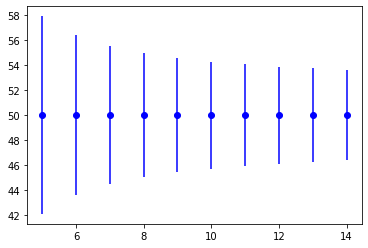

In [93]:
# it can also be helpful to demonstrate how the tolerance level will decrease (become more precise) as the size of the sample is increased
# the following example calculates and plots the tolerance interval for different sample sizes for the same small contrived problem
from numpy.random import seed
from numpy.random import randn
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot as plt

# seed the random number generator
seed(1)

# sample sizes
sizes = range(5,15)
for n in sizes:
    # generate dataset
    data = 5 * randn(n) + 50

    # calculate degrees of freedom
    dof = n - 1

    # specify data coverage
    prop = 0.95
    prop_inv = (1.0 - prop) / 2.0
    gauss_critical = norm.ppf(prop_inv)

    # specify confidence
    prob = 0.99
    prop_inv = 1.0 - prob
    chi_critical = chi2.ppf(prop_inv, dof)

    # tolerance
    tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
    
    # plot
    plt.errorbar(n, 50, yerr=tol, color='blue', fmt='o')
# plot results
plt.show()

# Extensions

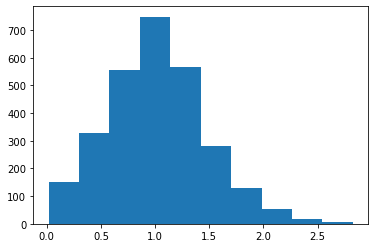

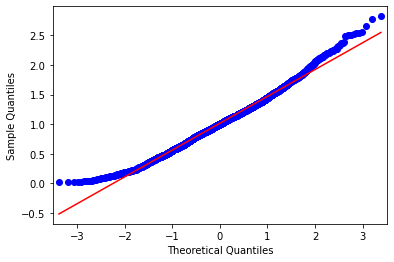

Shapiro Wilk: Sample does not look Gaussian (reject H0) 2.634089235793724e-13
D'Agostino: Sample does not look Gaussian (reject H0) 1.3949122361169914e-15

Whole weight of adult abalone: -1.01g to 3.04g covers 95% of data with a confidence of 99%


In [107]:
# Locate a dataset with a Gaussian variable and calculate tolerance intervals for it
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# import abalone data
filename = '20 abalone.csv'
data = pd.read_csv(filename)

# plot weight for adult abalone to check that it approximately resembles a Gaussian distribution
data = data[data['Sex'] != 'I']
#data = data[data['Whole_weight'] <= 2]
x = data['Whole_weight']
plt.hist(x)
plt.show()
qqplot(x, line='s')
plt.show()

# implement the Shapiro Wilk test to test for a Gaussian distribution
from scipy.stats import shapiro
W, p_value = shapiro(x)
alpha = 0.05
if p_value > alpha:
	print('Shapiro Wilk: Sample looks Gaussian (fail to reject H0)', p_value)
else:
	print('Shapiro Wilk: Sample does not look Gaussian (reject H0)', p_value)

# Now try D'Agostino's test
from scipy.stats import normaltest
stat, p_value = normaltest(x)
alpha = 0.05
if p_value > alpha:
	print("D'Agostino: Sample looks Gaussian (fail to reject H0)", p_value)
else:
	print("D'Agostino: Sample does not look Gaussian (reject H0)", p_value)

# Although the data is visually approximately Gaussian in the histogram (when restricted to whole_weight < 2), the QQ plot shows that it is not
# This is confirmed via the Shapiro Wilk and D'Agostino tests 
# As the distribution of data is not Gaussian, the calculation of the tolerance interval is therefore meaningless!

# specify degrees of freedom
n = len(x)
dof = n - 1

# specify data coverage of 95%
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)

# specify confidence of 99%
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)

# calculate tolerance interval
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)

# summarise
data_mean = mean(x)
lower, upper = data_mean-interval, data_mean+interval
print('\nWhole weight of adult abalone: %.2fg to %.2fg covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))

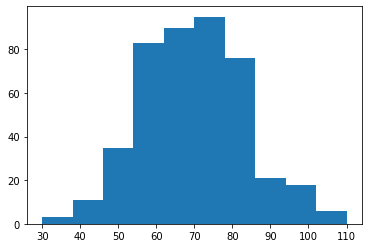

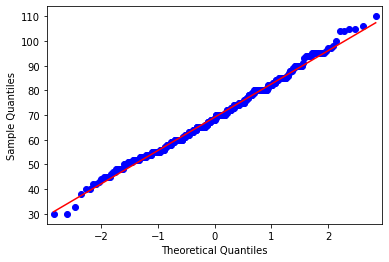

Shapiro Wilk: Sample looks Gaussian (fail to reject H0) 0.08828228712081909
D'Agostino: Sample looks Gaussian (fail to reject H0) 0.2794742853588419

Weight of patients: 67.01kg to 71.27kg covers 95% of data with a confidence of 99%


In [108]:
# Locate a dataset with a Gaussian variable and calculate tolerance intervals for it
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# import arrhythmia data
filename = '20 arrhythmia.csv'
data = pd.read_csv(filename)

# plot weight to check that it approximately resembles a Gaussian distribution (restrict weights to those between 30 and 110kgs)
data = data[data['Weight'] >= 30]
data = data[data['Weight'] <= 110]
x = data['Weight']
plt.hist(x)
plt.show()
qqplot(x, line='s')
plt.show()

# implement the Shapiro Wilk test to test for a Gaussian distribution
from scipy.stats import shapiro
W, p_value = shapiro(x)
alpha = 0.05
if p_value > alpha:
	print('Shapiro Wilk: Sample looks Gaussian (fail to reject H0)', p_value)
else:
	print('Shapiro Wilk: Sample does not look Gaussian (reject H0)', p_value)

# Now try D'Agostino's test
from scipy.stats import normaltest
stat, p_value = normaltest(x)
alpha = 0.05
if p_value > alpha:
	print("D'Agostino: Sample looks Gaussian (fail to reject H0)", p_value)
else:
	print("D'Agostino: Sample does not look Gaussian (reject H0)", p_value)

# specify degrees of freedom
n = len(x)
dof = n - 1

# specify data coverage of 95%
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)

# specify confidence of 99%
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)

# calculate tolerance interval
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)

# summarise
data_mean = mean(x)
lower, upper = data_mean-interval, data_mean+interval
print('\nWeight of patients: %.2fkg to %.2fkg covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))